# Classifying Fashion-MNIST

* 이번 실습에서는 지난 시간과 거의 유사한 작업을 Fashion-MNIST dataset에 대해서 수행하겠습니다

* Fashion-MNIST 는 28x28 흑백으로 된 의류 image입니다
* 숫자를 표현한 MNIST 보다는 더 복잡한 image가 되어, NN의 성능을 시험해보기 조금 더 난해한 dataset 입니다 (물론 지금 시대에는 여전히 쉬운 작업입니다)

* dataset에 대한 그림은 아래와 같습니다


![Classnote](https://drive.google.com/uc?export=download&id=1jS383QGptWGFyDrVO0i8Eo7BwXqV5epq)

* 작업은 여러분이 처음부터 끝까지 코딩을 하시면 됩니다
* 전체적인 흐름은 지난 주 숙제와 동일하기 때문에 (결국 10개의 의상 종류로 분류합니다) 지난 주 숙제 solution이나 본인이 짠 부분을 대부분 가져와서 해보시면 됩니다.

* 아래는 dataset을 준비하는 과정입니다

In [1]:
import torch
from torchvision import datasets, transforms
import helper

In [2]:
transform = transforms.Compose([transforms.ToTensor()])
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=2000, shuffle=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting C:\Users\hallym/.pytorch/F_MNIST_data/FashionMNIST\raw\train-images-idx3-ubyte.gz to C:\Users\hallym/.pytorch/F_MNIST_data/FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting C:\Users\hallym/.pytorch/F_MNIST_data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\hallym/.pytorch/F_MNIST_data/FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting C:\Users\hallym/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\hallym/.pytorch/F_MNIST_data/FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting C:\Users\hallym/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\hallym/.pytorch/F_MNIST_data/FashionMNIST\raw



In [3]:
images, labels = next(iter(trainloader))

In [4]:
images.shape

torch.Size([2000, 1, 28, 28])

In [5]:
torch.mean(images)

tensor(0.2812)

In [6]:
torch.std(images)

tensor(0.3508)

In [12]:
# pytorch에서 device를 cpu로 사용할건지 cuda로 사용할건지.
# cuda가 있으면 cuda에서 연산.
# ndivia의 GPU
device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'

In [13]:
torch.cuda.is_available()

True

- 기본적으로 제공해주는 Test data를 valset으로 사용.

In [15]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                # 3차원일 경우 배치사이즈(ex 2000)에 대해 채널별 평균, 표준편차 구해서 튜플 형태로 넣기.
                                transforms.Normalize((0.28,), (0.35,))])

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
valset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

* 아래 명령으로 이미지 중에 한개를 살펴봐서 준비가 되었는지 확인해 봅시다

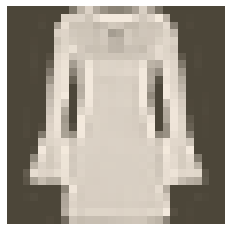

In [11]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

### Problem 1

* 이미지가 28x28인 점을 고려하여 지난주에 벡터로 변환하는 작업을 수행하고
* fc1,...,fc4 까지 linear layer를 만드시고
* 최종 output layer fc4는 10개 분류 작업을 할 수 있도록 구성

* Activation 함수는 ReLU, 최종 layer는 linear layer 만 연산
* Cost function 정의
* autograd, optimizer를 사용하여 training 수행 
* fc1 는 256의 크기로 구성
* fc2 는 128의 크기로 구성
* fc3 는 64의 크기로 구성
* epoch수는 5

In [16]:
image = image.reshape(image.shape[0], -1)
image.shape

torch.Size([64, 784])

In [17]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        # self.fc = nn.Sequential(
        #             nn.Linear(image.shape[1], 256),
        #             nn.ReLU(True),
        #             nn.Linear(256,128),
        #             nn.ReLU(True),
        #             nn.Linear(128,64),
        #             nn.ReLU(True) ,
        #             nn.Linear(64, 10)
        # )
        
        self.fc1 = nn.Linear(image.shape[1], 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
    ###############

### Problem 2: Training the network

In [19]:
# TODO: 네트워크를 training 하세요 (epoch는 5번으로 하죠)
model = Classifier()
model.to(device) #내 deivce는 cuda, 따라서 cuda메모리에 올림.
criterion = nn.CrossEntropyLoss()
# optim.SGD() -> optim을 Adam으로 , SGD의 단점을 보완한 알고리즘. 가볍게는 Adam, 넓은곳으로 가면 SGD
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader: # 첫 epoch에서 trainloader를 불러오기 때문에 젤 오래걸림.
        images = images.reshape(images.shape[0],-1).to(device) #이미지를 텐서로 핀 다음 to(device)를 통해 GPU에서 연산.
        labels = labels.to(device) # cpu에 있는 친구와 gpu에 있는 친구가 연산을 하면 오류가 나욤
        
        #### 답 작성
        logit = model(images) # images가 gpu에 있으니 모델도 gpu에 있어야함.
        loss = criterion(logit, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        #### 
        
        running_loss += loss.item()
    
    print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.474887062396322
Training loss: 0.3675859835801094
Training loss: 0.3324651117327371
Training loss: 0.31218018054739755
Training loss: 0.29746042052184596


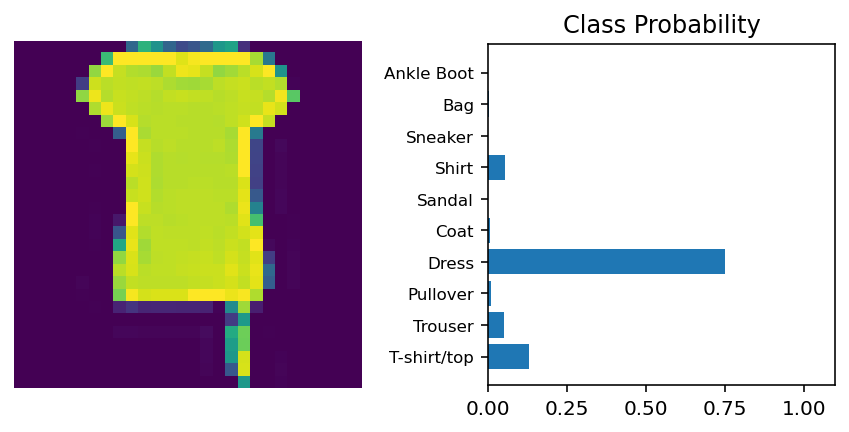

In [28]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Test out your network!

images, labels = next(iter(valloader))
img = images[1].reshape(1,-1)
img = img.to(device) # 항상 to(device) 하는 습관을 가지자.

# log softmax 값을 softmax로 변환하여 확률값을 저장
logits = model(img)
sm = nn.Softmax(dim=1) # row단위로!! nn.Softmax(dim = 1)을 통해 row 단위로 확률값을 구함.
ps = sm(logits)

# Plot the image and probabilities
helper.view_classify(img.to('cpu'), ps.cpu(), version='Fashion') #matplotlib은 cpu에 있어야지만 연산이 가능해짐.

# Part 2: Inference and Validation

* 지금까지는 network를 training하는 방법에 대해서 알아보았습니다
* Training 된 network를 활용하여 예측 (prediction)을 하는 것을 ML 용어로 inference라고 합니다
* Training된 network를 새로운 데이터에 대해서도 좋은 성능을 갖게하는 것을 generalization 이라고 합니다 
* 하지만, neural network (또는 모든 ML)은  training 된 데이터에 너무 최적화되어, 새로운 데이터에대해서 성능이 떨어지는 (generalization 이 안되는) 문제가 발생합니다. 이런 현상을  **overfitting** 이라고 합니다
* **Generalization** 이 잘되어서 **overfitting** 안일어났는지 확인하는 작업을 **validation** set으로 data를 분리하여 수행합니다
* Overfitting이 일어나지 않도록 처리하는 여러 기법을 **regularization** 이라고 하며, 대표적으로 **dropout**과 같은것이 있습니다
* 이번 실습에서는 **validation**에 대해서 알아보겠습니다
<br><br>
* dataset 은 torchvision을 통해서 load하겠습니다
* Torchvision에 대한 자세한 기능은 차차 배우기로 학고, 우선은 테스트 세트를 load하기 위해서 `train=False` 로 설정합니다

```python
valset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
```

* validation set은 trainging set과 비슷한 구조를 갖습니다

- regularization : Generalization 과정에서 validation 과정에서 overfitting 이 발견되었을 때 이 오버피팅을 막기위한 방법을 regularization이라 하는데 대표적인 예시로는 Dropout이있다.


* 본 작업에 목적은 training set에 포함하지 않은 data에 대해서 성능을 측정하는 것입니다
* 여기서 성능은 개발자에 의해서 용도에 맞게 설정합니다 
* 본 과제에서는 정확도 관점에서 성능을 측정학겠습니다
  - 즉 분류를 성공과 실패로 보고 성공의 비율을 측정합니다
* 기타 성능 측정을 위한 방법은 [precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall#Definition_(classification_context)) 과 top-5 error rate 등이 있습니다
* 시작으로, 한개에 batch에 대한 forward pass를 실행합니다

In [29]:
model = Classifier()

images, labels = next(iter(valloader))

# Get the class probabilities
images = images.reshape(images.shape[0],-1)
logits = model(images)
ps = sm(logits)
# Make sure the shape is appropriate, we should get 10 class probabilities for 64 examples
print(ps.shape)

torch.Size([64, 10])


* 출력은 각 classification 항목에 대한 확률 분포로 출력됩니다
* `ps.topk` method로 $k$개의 활률 값이 가장 높은 value와 index를 tuple로 받습니다
* 가장 높은 가능성으로 분류를 하고자하니, `ps.topk(1)`를 사용합니다
* 예를 들어서 가장 높은 value가 5번째이면 index 4를 받습니다

In [32]:
top_p, top_class = ps.topk(1, dim=1) # 가장 높은값 하나만 필요하니까. topk는 가장 높은값 n개를 return해줌.
# Look at the most likely classes for the first 10 examples
print(top_class[:10,:]) # 가장 높은 인덱스를 반환해줌.
print(top_p[:10,:]) # 값을 반환 해줌
top_class.shape

tensor([[3],
        [0],
        [0],
        [0],
        [0],
        [2],
        [0],
        [0],
        [0],
        [0]])
tensor([[0.1107],
        [0.1136],
        [0.1107],
        [0.1116],
        [0.1102],
        [0.1102],
        [0.1110],
        [0.1096],
        [0.1136],
        [0.1095]], grad_fn=<SliceBackward0>)


torch.Size([64, 1])

In [31]:
ps[:10,:]

tensor([[0.1097, 0.0885, 0.1010, 0.1107, 0.1062, 0.0956, 0.0977, 0.1063, 0.0900,
         0.0942],
        [0.1136, 0.0860, 0.1042, 0.1069, 0.1058, 0.0945, 0.1009, 0.1020, 0.0917,
         0.0944],
        [0.1107, 0.0887, 0.1056, 0.1063, 0.1049, 0.0910, 0.0987, 0.1030, 0.0968,
         0.0942],
        [0.1116, 0.0893, 0.1048, 0.1059, 0.1061, 0.0921, 0.0984, 0.1032, 0.0934,
         0.0952],
        [0.1102, 0.0898, 0.1048, 0.1058, 0.1021, 0.0940, 0.1008, 0.1041, 0.0945,
         0.0939],
        [0.1073, 0.0854, 0.1102, 0.1063, 0.1033, 0.0908, 0.0997, 0.1033, 0.0989,
         0.0947],
        [0.1110, 0.0866, 0.1089, 0.1019, 0.1036, 0.0919, 0.1021, 0.1037, 0.0952,
         0.0952],
        [0.1096, 0.0878, 0.1041, 0.1076, 0.1056, 0.0915, 0.0987, 0.1014, 0.0961,
         0.0975],
        [0.1136, 0.0882, 0.1011, 0.1110, 0.1063, 0.0942, 0.0966, 0.1017, 0.0907,
         0.0966],
        [0.1095, 0.0875, 0.1019, 0.1071, 0.1084, 0.0942, 0.1011, 0.1033, 0.0949,
         0.0921]], grad_fn=<

* 지금까지 네트워크에서 출력한 확률분포에서 가장 높은 확률값의 index를 64개 찾았습니다
* 이제 `top_class`와 `labels`를 비교하여 몇개를 맞췄는지 확인을 해야합니다
* 차원이 맞는 tensor 간에 `==`를 해서 비교합니다 (테스트 해보세요!)
* 다음을 실행하면 원하는 답이 나오지 않습니다
* `top_class`와 `labels`의 shape를 비교 해보고 싶은 생각이 드셔야합니다
```python
equals = top_class == labels
```
* (참고) broadcasting으로 `==` 연산이 일어난것이며, 우리가 원하는 연산은 아닙니다 

In [33]:
labels.shape

torch.Size([64])

In [34]:
top_class.shape

torch.Size([64, 1])

In [35]:
top_class == labels.reshape(top_class.shape)

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False

In [36]:
labels

tensor([4, 4, 7, 2, 9, 9, 8, 5, 8, 1, 0, 3, 2, 5, 6, 6, 3, 3, 8, 6, 4, 6, 0, 2,
        0, 9, 6, 0, 7, 9, 3, 8, 7, 0, 3, 9, 4, 8, 1, 5, 2, 3, 6, 9, 7, 6, 5, 0,
        8, 4, 0, 7, 2, 8, 7, 7, 3, 8, 2, 4, 5, 9, 0, 6])

In [37]:
equals = top_class == labels.reshape(top_class.shape) #reshape을 필수로 해줘야 함.
top_class.shape

torch.Size([64, 1])

In [40]:
equals #equals는 bool 타입이니까 float로 변환 필수.

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False

* 이제 분류가 성공한 비율을 찾기위해서 전체를 더하고 총수로 나누는 (평균)을 내면됩니다
* `torch.mean`이 유용한데 
* `torch.mean(equals)`를 실행하면

```
RuntimeError: mean is not implemented for type torch.ByteTensor
```
* `equals`를 float tensor로 변환하여 적용합니다


In [41]:
accuracy = torch.mean(equals.type(torch.float)) 
print(f'Accuracy: {accuracy*100}%')

Accuracy: 10.9375%


* 당연히 네트워크가 training이 안되었기 때문에 값이 랜덤하게 나옵니다
* 이제 전체 test data (validation set)에 대한 loop를 완성하려 합니다 (위는 한 batch)
* 아래 Exercise를 수행하는데 중요한 코드가 있습니다
* `torch.no_grad():`는 tensor에 gradient 정보 없이 작업을 할때 사용합니다. 당연히 training이 없으니 network parameter를 업데이트할 필요가 없고, gradient 정보를 저장하는데 쓸데 없는 연산과 메모리 사용을 방지할 수 있습니다. Validation과정에서는 필수입니다! 

```python
# turn off gradients
with torch.no_grad():
    # validation pass here
    for images, labels in testloader:
        ...
```


In [46]:
# 답 작성
model = Classifier()
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, val_losses = [], [] # 로스값 구하기.
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.reshape(images.shape[0],-1).to(device)
        labels = labels.to(device)
        

        # 답작성: Training 코드 
        optimizer.zero_grad()

        logit = model(images)
        loss = criterion(logit, labels)
        loss.backward()
        optimizer.step()

        
        
        #######################
        running_loss += loss.item() # gpu 로 할경우 
        
    
    val_loss = 0
    accuracy = 0

    
    #val 과정 no_grad()를 통해 Gradient 계산 안함.
    with torch.no_grad():
        for images, labels in valloader:
            # 위에서 train 후 validation 실행. train한번 당 validation 1번 실행.
            images = images.reshape(images.shape[0], -1).to(device)
            labels = labels.to(device)
            logits = model(images)
            val_loss += criterion(logits, labels).item()
            
            ps = sm(logits) # 확률값 구할거야.
            top_p, top_class = ps.topk(1, dim = 1) # 가장 높은 값 하나를 고르는데 그 값과 idx가져와
            equals = top_class == labels.reshape(top_class.shape) # 일치하는지 확인. 
            accuracy += torch.mean(equals.type(torch.float)) # 정확도 계산을 위해 float로 타입 변환 후 mean 계산.


            #######################

    train_losses.append(running_loss/len(trainloader))
    val_losses.append(val_loss/len(valloader))

    print("Epoch: {}/{}.. ".format(e+1, epochs),
          "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
          "Validation Loss: {:.3f}.. ".format(val_loss/len(valloader)),
          "Validation Accuracy: {:.3f}".format(accuracy/len(valloader)))

Epoch: 1/30..  Training Loss: 0.486..  Validation Loss: 0.436..  Validation Accuracy: 0.843
Epoch: 2/30..  Training Loss: 0.369..  Validation Loss: 0.398..  Validation Accuracy: 0.854
Epoch: 3/30..  Training Loss: 0.339..  Validation Loss: 0.390..  Validation Accuracy: 0.866
Epoch: 4/30..  Training Loss: 0.318..  Validation Loss: 0.368..  Validation Accuracy: 0.870
Epoch: 5/30..  Training Loss: 0.300..  Validation Loss: 0.369..  Validation Accuracy: 0.868
Epoch: 6/30..  Training Loss: 0.288..  Validation Loss: 0.363..  Validation Accuracy: 0.873
Epoch: 7/30..  Training Loss: 0.277..  Validation Loss: 0.361..  Validation Accuracy: 0.878
Epoch: 8/30..  Training Loss: 0.268..  Validation Loss: 0.357..  Validation Accuracy: 0.877
Epoch: 9/30..  Training Loss: 0.256..  Validation Loss: 0.368..  Validation Accuracy: 0.876
Epoch: 10/30..  Training Loss: 0.253..  Validation Loss: 0.350..  Validation Accuracy: 0.877
Epoch: 11/30..  Training Loss: 0.244..  Validation Loss: 0.354..  Validation Ac

In [47]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

Text(0, 0.5, 'loss')

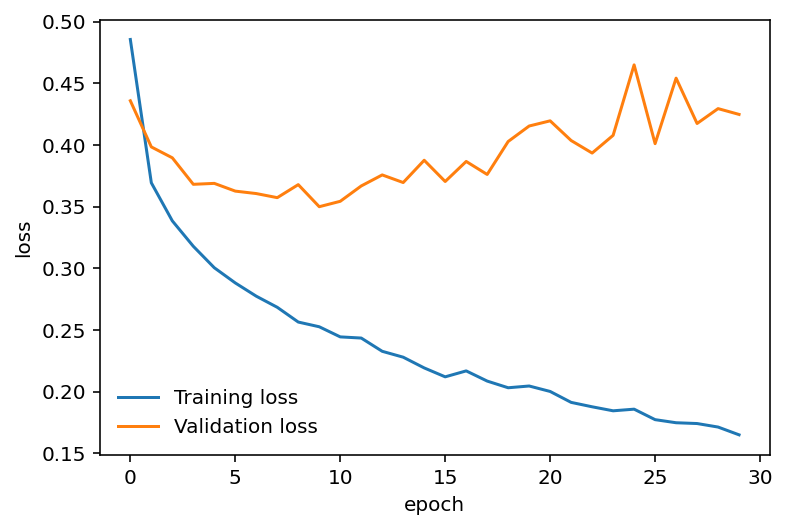

In [48]:
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend(frameon=False)
plt.xlabel('epoch')
plt.ylabel('loss')

## Overfitting

* 위에서 수행한 결과를 살펴보면 overfitting 현상을 확인할 수 있습니다
* 같지는 않지만, 아래와 같은 현상: -> 일반화가 제대로 되지않음.

![Classnote](https://drive.google.com/uc?export=download&id=1QOvGv2H28H0X94tkUo5VU40TPeSjpI9q)

- Training loss는 점점 줄어드는 반면, validation loss는 일정 줄어들다가 다시 늘어나는 현상을 확인 할 수 있습니다. 
- 궁극적인 목적은 새로운 data에 대해서 잘 동작하는 것이기 때문에 가장 낮은 validation loss를 갖도록 하는것이 목표 입니다
- 그래프에서 착안 할 수 있는 방법중 하나는 가장 낮아지는 epoch를 찾아서 멈추는 방법입니다. 이런 방법을 *early-stopping*이라고 합니다 
- 실제 적용하는 practice에서는 많은 training을 수행하며, 그 중에서 가장 좋은 성능(lowest validation error)의 network을 선택합니다
- Early stopping 이외에 매우 자주 사용되는 regularization 방법은 *dropout* 입니다
- Dropout은 네트워크의 연결을 `랜덤하게 일정 비율로 끊어버리는 방법`입니다
    - network의 자유도를 떨어트림.
- Dropout이 왜 효과가 있는지는 이론 수업에서 다루도록 하겠습니다
- Pytorch에서 dropout을 수행하는 방법은 [`nn.Dropout`](https://pytorch.org/docs/stable/nn.html#torch.nn.Dropout) module 통해서 합니다

```python
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = None
        self.fc2 = None
        self.fc3 = None
        self.fc4 = None
        
        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        
        # output so no dropout here
        x = self.fc4(x)
        
        return x
```

* 여기서 Dropout은 training 단계에서만 사용하고, validation에서는 전체 네트워크를 사용해야 합니다 (Why?)
* 즉, validation 과정에서는 dropout을 비활성화 해야하죠
  - 이를 위해서 `model.eval()`을 사용합니다
  - 즉, `model.eval()` 모드 하에서는 droupout 확률이 0으로 동작합니다   
  - 다시 dropout를 수행할때는 `model.train()`으로 활성화 합니다
  - 일반적으로 아래와 같이 동작하죠
    1. Validation loop에서 gradient를 끄고, model을 evaluation mode로 설정
    2. validation loss를 계산하고 
    3. 다시 train mode로 변경 
    
```python
# turn off gradients
with torch.no_grad():
    
    # set model to evaluation mode
    model.eval()
    
    # validation pass here
    for images, labels in testloader:
        ...

# set model back to train mode
model.train()
```

**Problem 3:** 

- 아래 코드에서 dropout를 사용하기 위한 필요한 곳을 수정/채워 주세요
- model 에 dropout 적용, model.eval, model.train 등
- 아래 코드는 위에 적용했던 코드 problem 1 부분 제외한 모음입니다
- Template이라고 생각학고 적용하시면 됩니다

In [52]:
class Classifier(nn.Module):
    
    # 앞 문제에서 작성한 network에 dropout 적용
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(image.shape[1], 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        self.dropout = nn.Dropout(p = 0.2) #주로 0.2 ~ 0.5 사이 값이 결과가 좋다. 20% 에서 50% 만큼 연결 끊기.

    def forward(self, x):
        # tensor 피기
        # x = x.view(x.shape[0], -1)
        
        
        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        
        #출력
        # 마지막 출력문에서 dropout을 적용하지 않는 이유 : 중간중간 빵꾸가 나면 일부 class에 대해서 예측을 하지 못하기 때문.
        x = self.fc4(x)
        return x
    ##############################

In [55]:
    model = Classifier()
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.003)

    epochs = 30
    steps = 0

    train_losses, val_losses = [], []
    for e in range(epochs):
        running_loss = 0


        for images, labels in trainloader:
            images = images.reshape(images.shape[0],-1).to(device)
            labels = labels.to(device)


            # training 답 작성 
            optimizer.zero_grad()

            logit = model(images)
            loss = criterion(logit, labels)
            loss.backward()
            optimizer.step()


            #######################
            running_loss += loss.item()


        val_loss = 0
        accuracy = 0

        # Gradient를 계산할 필요 없으니 비활성화 
        with torch.no_grad():
            model.eval()
            for images, labels in valloader:
                images = images.reshape(images.shape[0], -1).to(device)
                labels = labels.to(device)
                
                logit = model(images)
                val_loss += criterion(logit, labels).item()
                
                ps = sm(logit)
                top_p , top_class = ps.topk(1, dim = 1)
                equals = top_class == labels.reshape(top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))

                ##################

        model.train()
        train_losses.append(running_loss/len(trainloader))
        val_losses.append(val_loss/len(valloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Validation Loss: {:.3f}.. ".format(val_losses[-1]),
              "Validation Accuracy: {:.3f}".format(accuracy/len(valloader)))

Epoch: 1/30..  Training Loss: 0.569..  Validation Loss: 0.422..  Validation Accuracy: 0.845
Epoch: 2/30..  Training Loss: 0.448..  Validation Loss: 0.430..  Validation Accuracy: 0.851
Epoch: 3/30..  Training Loss: 0.429..  Validation Loss: 0.420..  Validation Accuracy: 0.853
Epoch: 4/30..  Training Loss: 0.413..  Validation Loss: 0.414..  Validation Accuracy: 0.857
Epoch: 5/30..  Training Loss: 0.397..  Validation Loss: 0.406..  Validation Accuracy: 0.858
Epoch: 6/30..  Training Loss: 0.384..  Validation Loss: 0.387..  Validation Accuracy: 0.866
Epoch: 7/30..  Training Loss: 0.381..  Validation Loss: 0.406..  Validation Accuracy: 0.856
Epoch: 8/30..  Training Loss: 0.379..  Validation Loss: 0.407..  Validation Accuracy: 0.862
Epoch: 9/30..  Training Loss: 0.366..  Validation Loss: 0.378..  Validation Accuracy: 0.868
Epoch: 10/30..  Training Loss: 0.363..  Validation Loss: 0.392..  Validation Accuracy: 0.865
Epoch: 11/30..  Training Loss: 0.366..  Validation Loss: 0.378..  Validation Ac

In [56]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

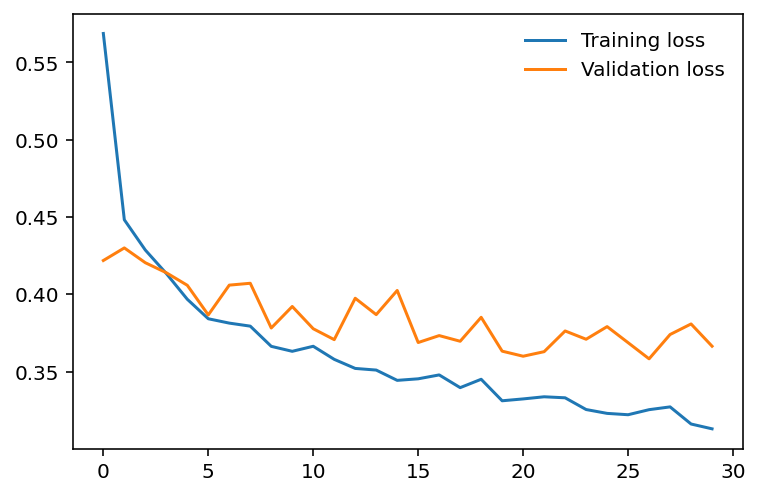

In [57]:
plt.plot(train_losses[:30], label='Training loss')
plt.plot(val_losses[:30], label='Validation loss')
plt.legend(frameon=False)

###### Inference

* 이제 실제 적용하는 예입니다 (inference)
* 내가 분류작업을 한다고 생각학고 traning이 끝난 네트워크에 적용합니다
* 당연히 model.eval()과 gradient는 비활성화합니다

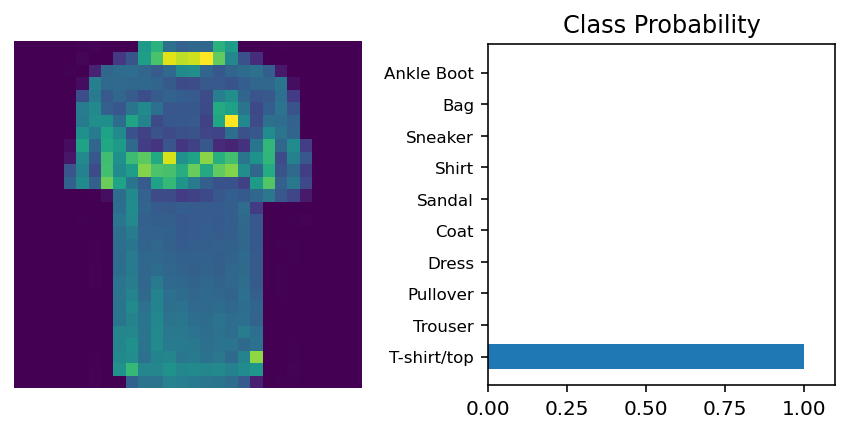

In [58]:
# Import helper module (should be in the repo)
import helper

# Test out your network!

model.eval()

dataiter = iter(valloader)
images, labels = dataiter.next()
images = images.reshape(images.shape[0],-1).to(device)
labels = labels.to(device)
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = sm(output)

# Plot the image and probabilities
img = img.cpu()
ps = ps.cpu()
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')

In [ ]:
# helper가 안 돌아감 버전 문제 인 거 같은데 확인 해 봐야 될 듯